In [1]:
import json
import model_utility
import glob
import matplotlib.pyplot as plt
import albumentations as alb
import cv2


In [29]:
def display_results(results_path, axs = None):
    if axs is None:
        axs = plt.gca()

    with open(results_path) as json_file:
        results = json.load(json_file)

    print("Which model is this? -",results_path.split("/")[-1])
    type = results_path.split("/")[-1].split("_")[0]

    iou_score = results['iou_score']
    val_iou_score = results['val_iou_score']
    loss = results['loss']
    val_loss = results['val_loss']
    eval_results = results['eval_results']

    # print(max(val_iou_score))
    print(val_iou_score.index(max(val_iou_score)))

    epochs = range(1, len(iou_score) + 1)
    # plt.figure()
    axs.plot(epochs, iou_score, 'bo', label='Training acc')
    axs.plot(epochs, val_iou_score, 'b', label='Validation acc')
    axs.plot(val_iou_score.index(max(val_iou_score)), max(val_iou_score), 'ro', label='best epoch')


    # axs.text(300,.6,f'{round(eval_results[-1], 3)}',horizontalalignment='right')
    axs.set_title(f'{type} - Score: {round(max(val_iou_score), 5)}')
    axs.legend(loc = "lower right")


    # plt.yscale("log")
    # plt.plot(epochs, loss, 'bo', label='Training loss')
    # plt.plot(epochs, val_loss, 'b', label='Validation loss')
    # plt.title(f'{type} Spoke Training and validation loss')
    # plt.legend()

    # plt.show()
    print("Last Train IOU Score: ",results['iou_score'][-1])
    print("Last Train Loss Score: ", results['loss'][-1])
    print("Last Validation IOU Score: ", results['val_iou_score'][-1])
    print("Last Validation Loss Score: ", results['val_loss'][-1])
    print("Eval Results: ", results['eval_results'])
    json_file.close()

Which model is this? - darkGBAug_spoke_360im_300e_resnet34.json
Last Train IOU Score:  0.9896550178527832
Last Train Loss Score:  0.0007314351387321949
Last Validation IOU Score:  0.9851446151733398
Last Validation Loss Score:  0.0012366727460175753
Eval Results:  [0.0008709310204721987, 0.9868107438087463]
Which model is this? - darkRTCAug_spoke_360im_300e_resnet34.json
Last Train IOU Score:  0.9649109244346619
Last Train Loss Score:  0.0023207992780953646
Last Validation IOU Score:  0.9585983753204346
Last Validation Loss Score:  0.0026666049379855394
Eval Results:  [0.0020118621177971363, 0.9637076258659363]
Which model is this? - darkRBCAug_spoke_360im_300e_resnet34.json
Last Train IOU Score:  0.9776678681373596
Last Train Loss Score:  0.0015832107746973634
Last Validation IOU Score:  0.9715821743011475
Last Validation Loss Score:  0.0020508484449237585
Eval Results:  [0.0012726782588288188, 0.9775792956352234]
Which model is this? - dark8Aug_spoke_360im_300e_resnet34.json
Last Tra

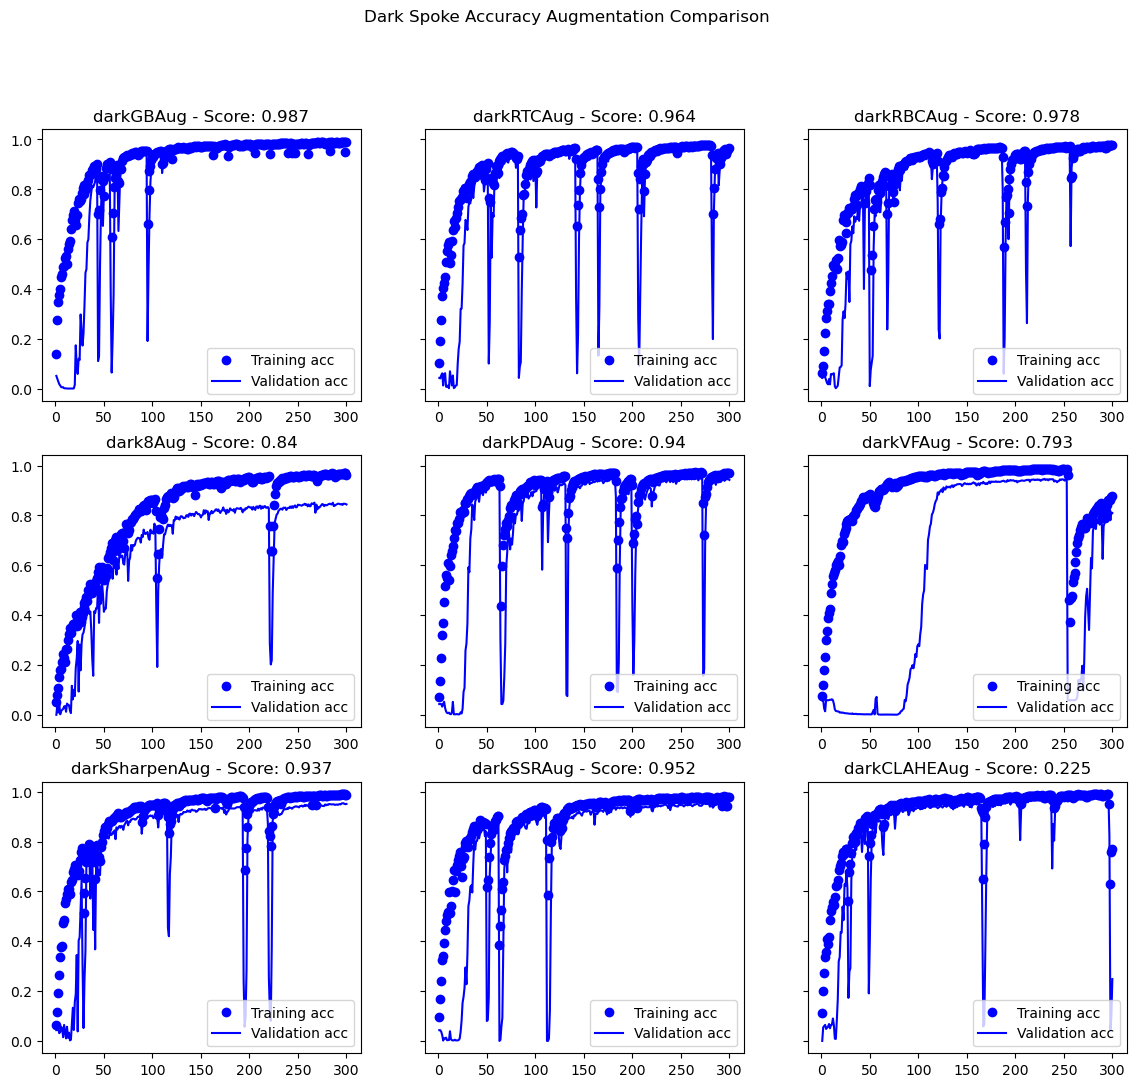

In [6]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(14,12))
glob.glob("../models/dark/*.json")
axes = axes.flatten()
f.suptitle("Dark Spoke Accuracy Augmentation Comparison")

for path, axs in zip(glob.glob("../models/dark/*.json"), axes):

    plot_num = int(f"31{glob.glob('../models/dark/*.json').index(path)}")+1
    display_results(path, axs)
plt.show()

# Long Model

Which model is this? - dark2Aug_spoke_360im_1400e_resnet34.json
Last Train IOU Score:  0.9993763566017151
Last Train Loss Score:  3.6315297620603815e-05
Last Validation IOU Score:  0.968753457069397
Last Validation Loss Score:  0.011049313470721245
Eval Results:  [0.009447143413126469, 0.9656668305397034]


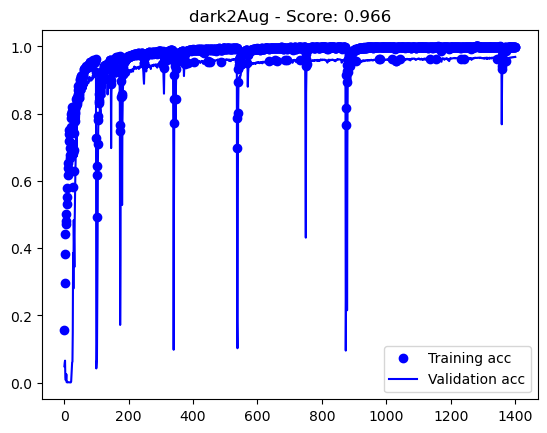

In [2]:
display_results("../models/dark/dark2Aug_spoke_360im_1400e_resnet34.json")

# Longest Model

Which model is this? - dark8Aug_spoke_360im_5000e_resnet34.json
Last Train IOU Score:  0.9998251795768738
Last Train Loss Score:  2.1435858798213303e-05
Last Validation IOU Score:  0.8564355969429016
Last Validation Loss Score:  0.08549803495407104
Eval Results:  [0.10148287564516068, 0.7749747633934021]


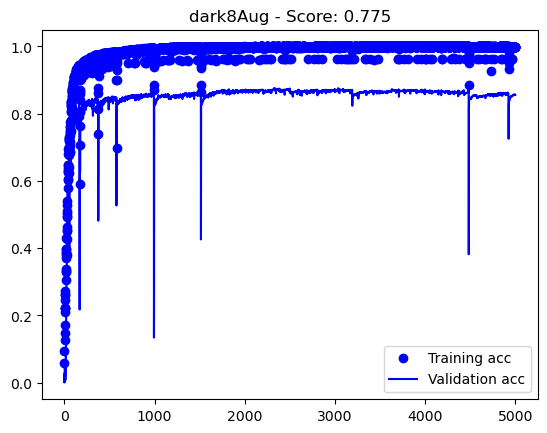

In [3]:
display_results("../models/dark/dark8Aug_spoke_360im_5000e_resnet34.json")

# How ModelCheckpoint works

Which model is this? - darkGB_Callback_spoke_360im_1000e_resnet34.json
827
Last Train IOU Score:  0.999949038028717
Last Train Loss Score:  5.013506324758055e-06
Last Validation IOU Score:  0.9999402165412903
Last Validation Loss Score:  8.694821190147195e-06
Eval Results:  [3.268335058237426e-05, 0.9996705055236816]


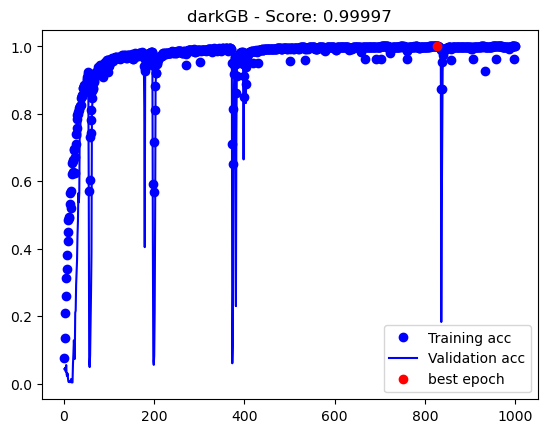

In [30]:
display_results("../models/dark/darkGB_Callback_spoke_360im_1000e_resnet34.json")